### 02. 장단기 메모리(Long Short-Term Memory, LSTM)

- 바닐라 아이스크림이 가장 기본적인 맛을 내는 아이스크림인 것처럼, 앞서 배운 RNN을 가장 단순한 형태의 RNN이라고 하여 바닐라 RNN이라고 한다.
    - 케라스에서는 SimpleRNN
- 바닐라 RNN 이후 바닐라 RNN의 한계를 극복하기 위한 다양한 RNN의 변형이 나왔다.
    - **LSTM**
- 앞으로의 설명에서 LSTM과 비교하여 RNN을 언급하는 것은 전부 바닐라 RNN을 말한다.

#### 1. 바닐라 RNN의 한계
- 장기 의존성 문제(the problem of Long-Term Dependencies)

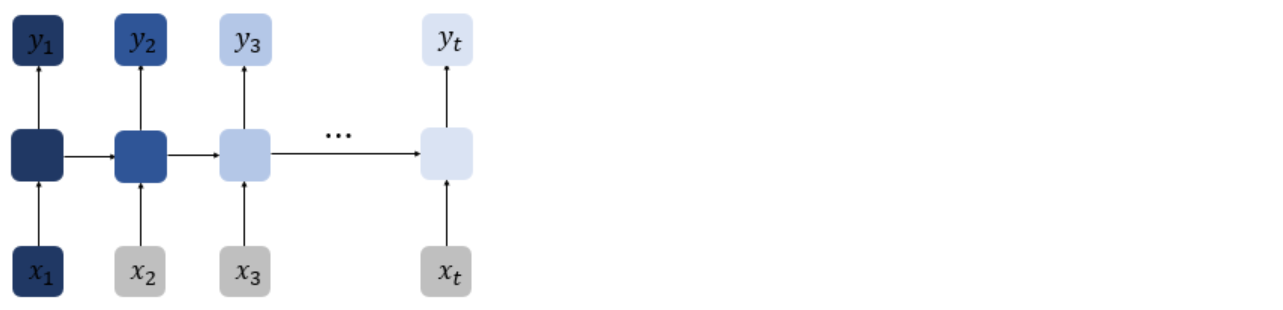

In [1]:
from IPython.display import Image
Image("b1.PNG")

- 바닐라 RNN은 출력 결과가 이전의 계산 결과에 의존한다.
- 하지만 바닐라 RNN은 비교적 짧은 시퀀스에 대해서만 효과를 보이는 단점이 있다.
    - 바닐라 RNN의 시점(time step)이 길어질수록 앞의 정보가 뒤로 충분히 전달되지 못하는 상황 발생
    - 예를 들어,
        - 위 그림에서 첫번째 입력값인 x1의 정보량을 짙은 남색으로 표현했을 때, 색이 점점 얕아지는 것으로 시점이 지날수록, x1의 정보량이 손실되어가는 과정 표현
        - 뒤로 갈수록 x1의 정보량은 손실되고, 시점이 충분히 긴 상황에서는 x1의 전체 정보에 대한 영향력은 거의 의미가 없을 수도 있다.
        - 만약, 중요한 정보가 맨 앞에 위치한다면 ???

------------------------------------------------------------------------------------------------------------------

#### 2. 바닐라 RNN 내부 열어보기

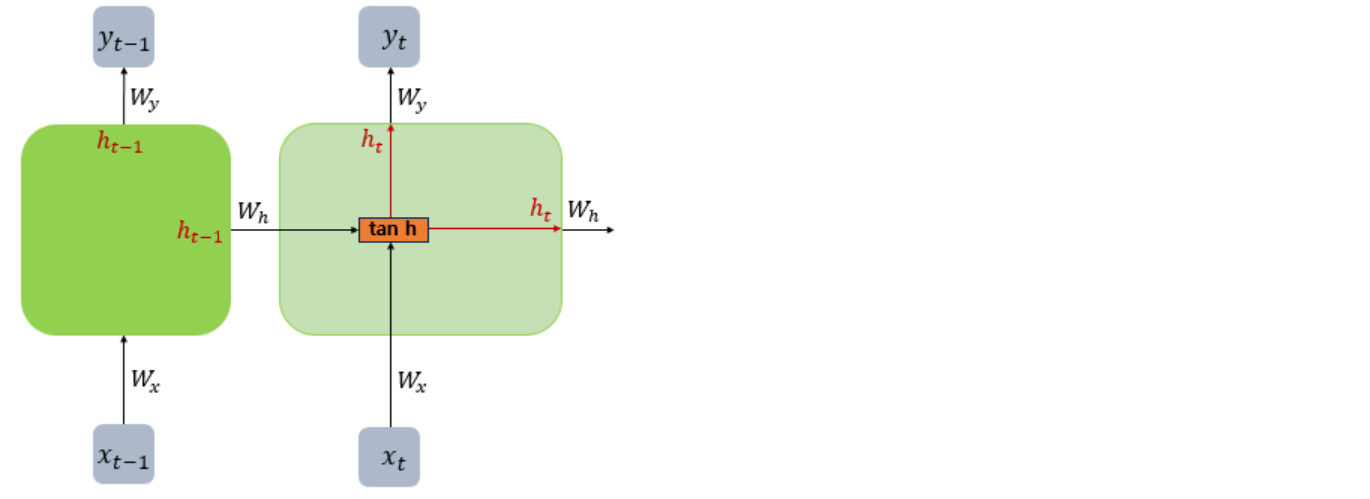

In [2]:
Image("b2.PNG")

- 바닐라 RNN의 내부 구조(편향 b생략)
    - 바닐라 RNN은 x_t와 h_t-1이라는 두 개의 입력이 각각의 가중치와 곱해져서 메모리 셀의 입력이 된다.
    - 이를 하이퍼볼릭탄젠트 함수의 입력으로 사용하고 이 값은 은닉층의 출력인 은닉 상태가 된다.
- h_t = tanh(W_x*x_t + W_h*h_t-1 + b)

------------------------------------------------------------------------------------

#### 3. LSTM(Long Short-Term Memory)

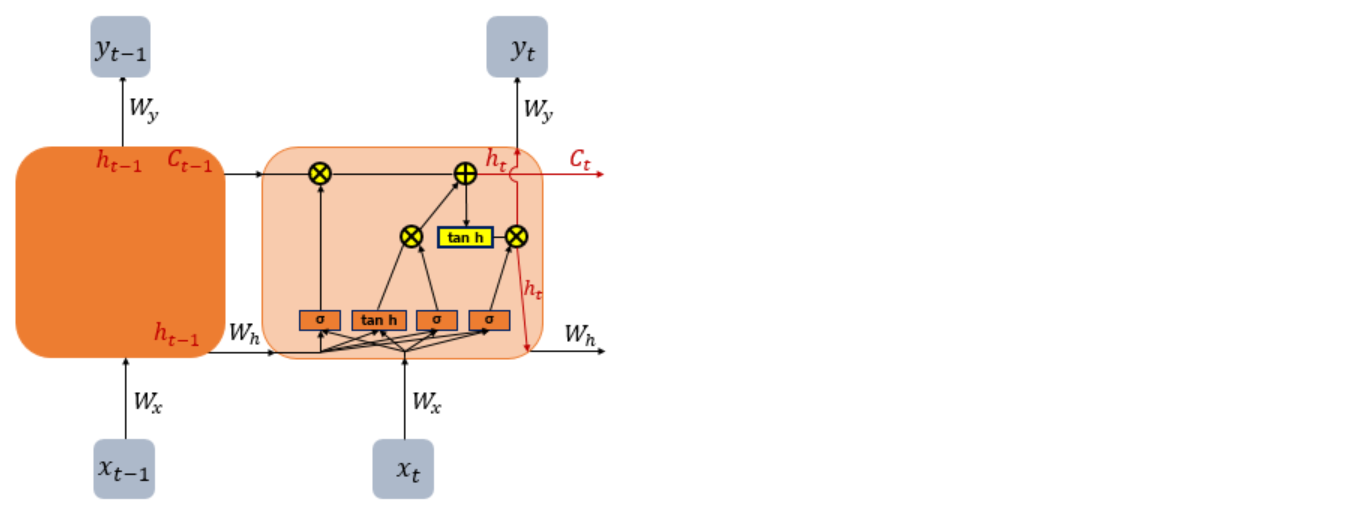

In [2]:
Image("b3.PNG")

- LSTM의 전체적인 내부
    - LSTM은 은닉층의 메모리 셀에 **입력 게이트, 망각 게이트, 출력 게이트**를 추가하여 불필요한 기억을 지우고, 기억해야할 것들을 정한다.
    - 위의 그림에서는 t시점의 셀 상태를 C_t로 표현
- 전통적인 RNN의 이러한 단점을 보완한 RNN의 일종을 장단기 메모리(Long Short-Term Memory)라고 하며, 줄여서 LSTM이라고 한다.
    - 요약하면, LSTM은 은닉 상태(hidden state)를 계산하는 식이 전통적인 RNN보다 조금 더 복잡해졌으며 **셀 상태(cell state)** 라는 값을 추가하였다.
    - LSTM은 RNN과 비교하여 긴 시퀀스의 입력을 처리하는데 탁월한 성능을 보인다.


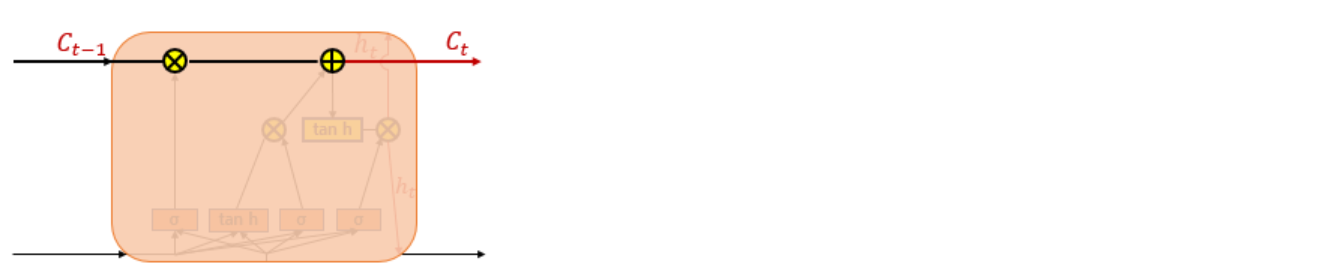

In [5]:
Image("b4.png")

- 셀 상태는 위의 그림에서 왼쪽에서 오른쪽으로 가는 굵은 선
    - 셀 상태 또한 이전에 배운 은닉 상태처럼 이전 시점의 셀 상태가 다음 시점의 셀 상태를 구하기 위한 입력으로 사용된다.
- 은닉 상태값과 셀 상태값을 구하기 위해서 새로 추가 된 3개의 게이트를 사용한다.
    - 각 게이트는 삭제 게이트, 입력 게이트, 출력 게이트라고 부른다.
    - 3개의 게이트에는 공통적으로 시그모이드 함수가 존재한다.
    - 시그모이드 함수를 지나면 0과 1사이의 ㄱ밧이 나오게 되는데 이 값들을 가지고 게이트를 조절한다.

[각각의 변수 정의]
- sigma : 시그모이드 함수를 의미
- tanh : 하이퍼볼릭탄젠트 함수를 의미
- W_xi, W_xg, W_xf, W_xo : x_t과 함께 각 게이트에서 사용되는 4개의 가중치
- W_hi, W_hg, W_hf, W_ho : h_t-1와 함께 각 게이트에서 사용되는 4개의 가중치
- b_i, b_g, b_f, b_o : 각 게이트에서 사용되는 4개의 편향

##### **(1)입력 게이트**

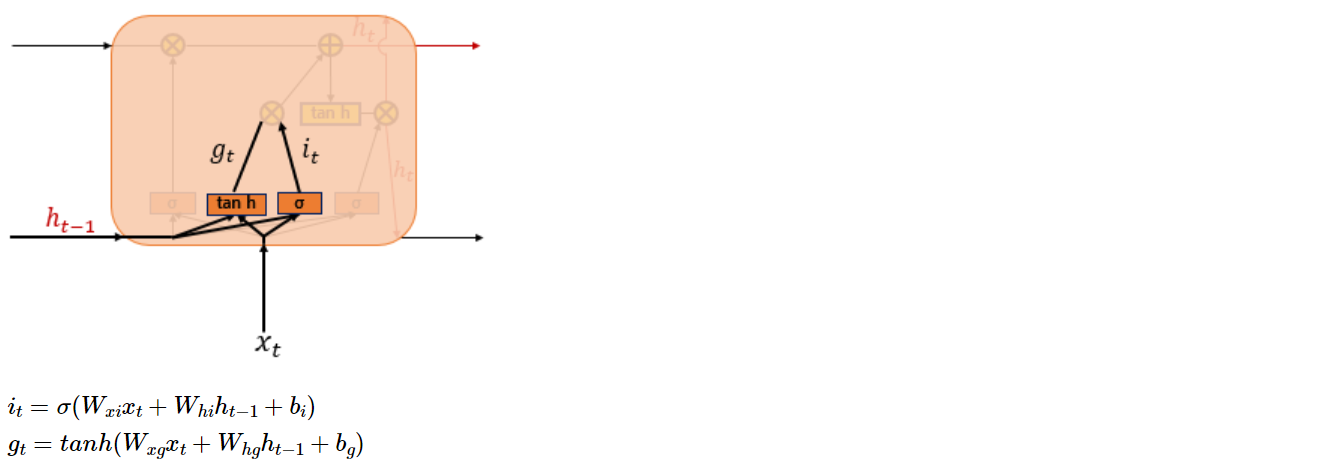

In [7]:
Image("b5.png")

- 입력 게이트는 현재 정보를 기억하기 위한 게이트
- **i_t** : 우선 현재 시점 t의 x값과 입력 게이트로 이어지는 W_xi를 곱한 값 + 이전 시점 t-1의 은닉 상태가 입력 게이트로 이어지는 가중치 W_hi를 곱한 값을 더하여 시그모이드 함수를 지난다.
- **g_t** : 현재 시점 t의 x값과 입력 게이트로 이어지는 W_xi를 곱한 값 + 이전 시점 t-1의 은닉 상태가 입력 게이트로 이어지는 가중치 W_hi를 곱한 값을 더하여 하이퍼볼릭탄젠트 함수를 지난다.
- 시그모이드 함수를 지나 0과 1 사이의 값 & 하이퍼볼릭탄젠트 함수를 지나 -1과 1 사이의 값 두개가 나오게 된다.
    - 이 두개의 값을 가지고 선택된 기억할 정보의 양을 정한다.(셀 상태 수식 참고)

##### **(2) 삭제 게이트**

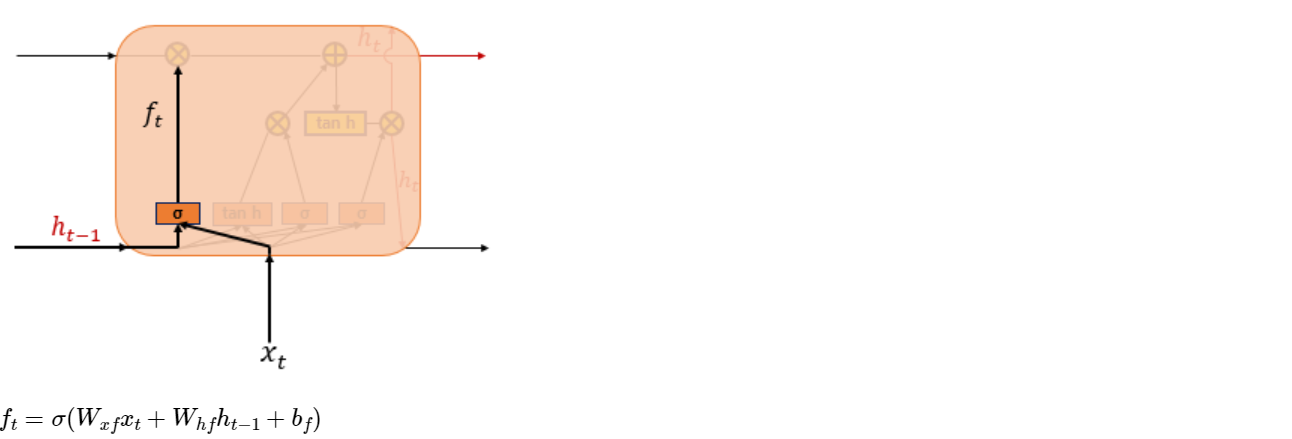

In [8]:
Image("b6.png")

- 기억을 삭제하기 위한 게이트
- 현재 시점 t의 x값과 이전 시점 t-1의 은닉 상태가 시그모이드 함수를 지난다.
    - 시그모이드 함수를 지나면 0과 1 사이의 값이 나오게 되는데, 이 값이 곧 삭제 과정을 거친 정보의 양
    - 0에 가까울수록 정보가 많이 삭제된 것, 1에 가까울수록 정보를 온전히 기억한 것
    - 이를 가지고 셀 상태를 구하게 된다.(셀 상태 수식 참고)

##### **(3) 셀 상태(장기 상태)**

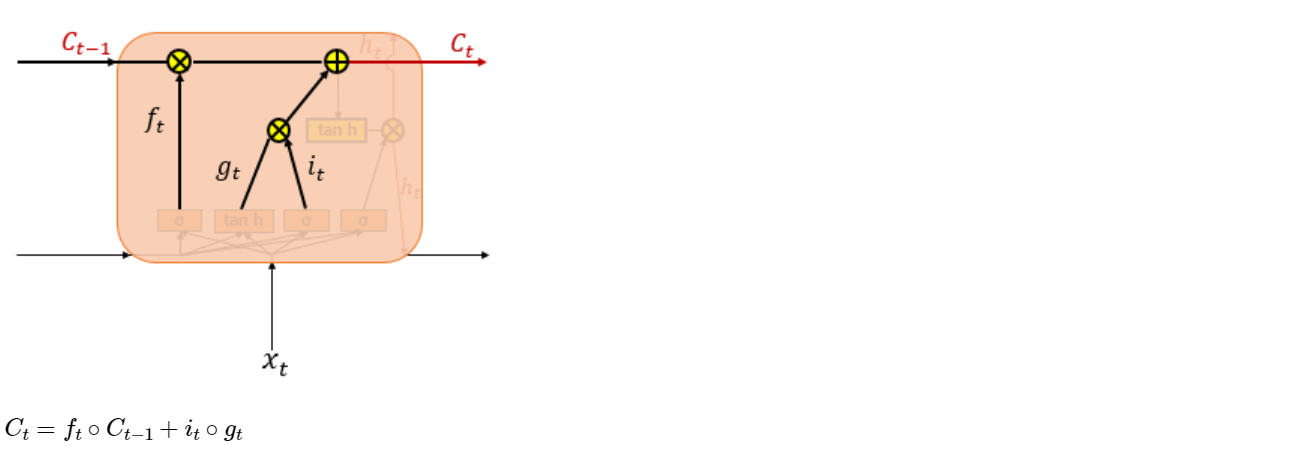

In [9]:
Image("b7.png")

- 셀 상태 C_t를 LSTM에서는 장기 상태라고 부르기도 한다.
- 셀 상태를 구한는 방법(삭제 게이트에서 일부 기억을 잃은 상태)
    - 입력 게이트에서 구한 i_t, g_t 이 두개의 값에 대해서 **원소별 곱(entrywise product)** 을 진행
    - 즉, 같은 크기의 두 행렬이 있을 때 같은 위치의 성분끼리 곱하는 것을 말한다.
    - o으로 표현하고, 이것이 이번에 선택된 기억할 값이다.
- 삭제 게이트와 입력 게이트의 영향력
    - 삭제 게이트의 출력값인 f_t = 0이 된다면
        - 이전 시점의 셀 상태값인 C_t-1은 현재 시점의 셀 상태값을 결정하기 위한 영향력이 0이 된다.
        - 오직 입력 게이트의 결과만이 현재 시점의 셀 상태값 C_t를 결정할 수 있다.
        - 삭제 게이트가 완전히 닫히고, 입력 게이트를 연 상태를 의미한다.
    - 입력 게이트의 i_t = 0이 된다면
        - 현재 시점의 셀 상태값 C_t는 오직 이전 시점의 셀 상태값 C_t-1의 값에만 의존한다.
        - 이는 입력 게이트를 완전히 닫고 삭제 게이트만을 연 상태
    - **결과적으로 삭제 게이트는 이전 시점의 입력을 얼마나 반영할지를 의미하고, 입력 게이트는 현재 시점의 입력을 얼마나 반영할지를 결정한다.**


##### **(4) 출력 게이트와 은닉 상태(단기 상태)**

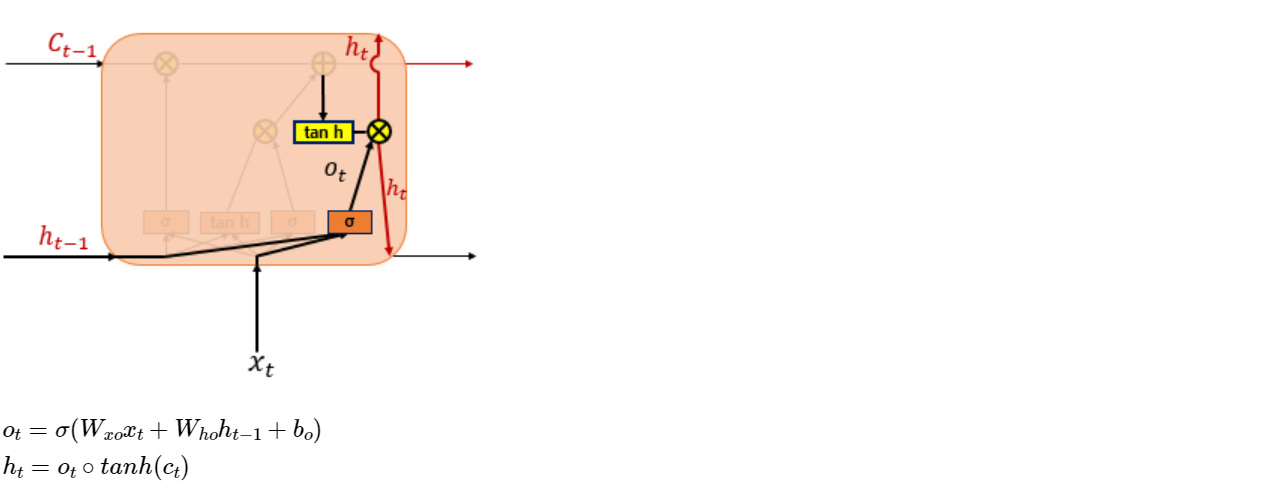

In [3]:
Image("b8.PNG")

- 출력 게이트는 현재 시점 t의 x값과 이전 시점 t-1의 은닉 상태가 시그모이드 함수를 지난 값
    - 해당 값은 현재 시점 t의 은닉 상태를 결정하는 일에 쓰인다.
- 은닉 상태(단기 상태)는 장기 상태의 값이 하이퍼볼릭탄젠트 함수를 지나 -1과 1사이의 값
    - 해당 값은 출력 게이트의 값과 연산되면서, 값이 걸러지는 효과 발생
    - 단기 상태의 값은 또한 출력층으로도 향한다.

------------------------------------------------------------------------------------

#### 4. 파이토치의 nn.LSTM()

##### (1) 기존 RNN 셀 사용

In [ ]:
nn.RNN(input_dim, hidden_size, batch_first=True)

##### (2) LSTM 사용

In [ ]:
nn.LSTM(input_dim, hidden_size, batch_first=True)